In [5]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings


In [6]:
df = pd.read_csv("C:/Users/Aswini/Downloads/archive.zip")

In [7]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [8]:
x=df.drop(columns=['math score'],axis=1)	
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [21]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [9]:
y=df['math score']	
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [25]:
# creation of transformer columns:

num_cols = x.select_dtypes(exclude="object").columns
cat_cols = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_trans = StandardScaler()
oh_tran = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_tran, cat_cols),
        ("StandardScaler", num_trans, num_cols),
    ]
)


In [27]:
x = preprocessor.fit_transform(x)

x.shape


(1000, 19)

In [29]:
# Separating Train and test for the data:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

In [31]:
# Creating an evaluate function to give all metrics after model training:

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    
    return mae, mse, rmse, r2


In [44]:
models = {
    "LR": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNN": KNeighborsRegressor(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2, model_train_mape = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2, model_test_mape = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('-----------------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('=' * 35)
    print('\n')


LR
Model performance for Training set
- Root Mean Squared Error: 27.6593
- Mean Absolute Error: 4.1681
- R2 Score: 5.2592
-----------------------------------------
Model performance for Test set
- Root Mean Squared Error: 31.6043
- Mean Absolute Error: 4.5734
- R2 Score: 5.6218


Lasso
Model performance for Training set
- Root Mean Squared Error: 42.9021
- Mean Absolute Error: 5.1997
- R2 Score: 6.5500
-----------------------------------------
Model performance for Test set
- Root Mean Squared Error: 43.5166
- Mean Absolute Error: 5.1005
- R2 Score: 6.5967


Ridge
Model performance for Training set
- Root Mean Squared Error: 27.6618
- Mean Absolute Error: 4.1672
- R2 Score: 5.2594
-----------------------------------------
Model performance for Test set
- Root Mean Squared Error: 31.5742
- Mean Absolute Error: 4.5672
- R2 Score: 5.6191


KNN
Model performance for Training set
- Root Mean Squared Error: 33.2573
- Mean Absolute Error: 4.5672
- R2 Score: 5.7669
----------------------------

In [48]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % score)


Accuracy of the model is 85.24


Text(0, 0.5, 'Predicted')

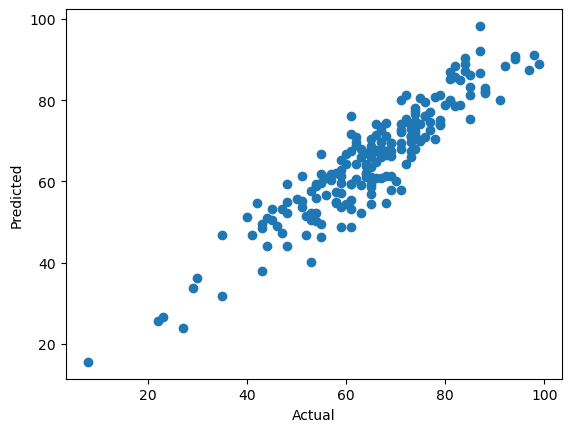

In [50]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')


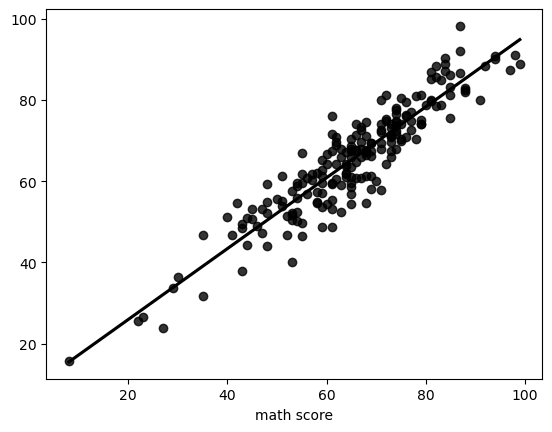

In [56]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='black');


In [ ]:
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred
})
pred_df


,Actual Value,Predicted Value,Difference
519,67,66.003977,0.996023
837,75,69.919265,5.080735
208,74,67.990259,6.009741
525,68,71.094116,-3.094116
978,55,49.586599,5.413401
...,...,...,...
647,64,61.992020,2.007980
481,52,46.828127,5.171873
134,74,73.568230,0.431770
366,69,57.981808,11.018192
